In [1]:
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import time

# 데이터 로드

In [2]:
# 원본 데이터 로드

after = pd.read_csv('after_sys_dif_210430.csv')

In [3]:
after.info()  # 데이터 프레임 정보 확인 -> 약 7기가 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982000 entries, 0 to 981999
Columns: 947 entries, Fake_Mainlotid to Lot_Wafer
dtypes: float64(940), int64(5), object(2)
memory usage: 6.9+ GB


In [4]:
def reduce_mem_usage(props):  # 메모리 사용량을 줄이는 함수 -> 작동 중에 메모리 사용량이 1.5배 정도로 늘었다가 결국 압축됨
    
    from tqdm.notebook import tqdm
    
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print(f"Memory usage of properties dataframe is : {start_mem_usg:.4f} MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    
    
    for col in tqdm(props.columns, desc='resizing progress: '):
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
            
        else:
            org_mems = props[col].memory_usage(index=False, deep=True)
            cate_mems = props[col].astype('category').memory_usage(index=False, deep=True)
            
            if org_mems > cate_mems:
                
                # Print current column type
                print("******************************")
                print("Column: ",col)
                print("dtype before: ",props[col].dtype)
                
                props[col] = props[col].astype('category')

                # Print new column type
                print("dtype after: ",props[col].dtype)
                print("******************************")
                
            else:
                continue
            
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print(f"Memory usage is: {mem_usg:.4f} MB")
    print("This is (100*mem_usg/start_mem_usg:.2f)% of the initial size")
    return props, NAlist

In [5]:
# https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65


In [6]:
after, _ = reduce_mem_usage(after)

Memory usage of properties dataframe is : 7094.9861 MB


******************************
Column:  Fake_Mainlotid
dtype before:  object
dtype after:  category
******************************
******************************
Column:  Fake_Waferseq
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Xdiepos
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Ydiepos
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Fake_Systemno
dtype before:  object
dtype after:  category
******************************
******************************
Column:  Fake_1CHAR_MAP
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  C1
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C2
dtype before:  float64
dtype after:  float32
******************************
********

dtype after:  float32
******************************
******************************
Column:  C64
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C65
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C66
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C67
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C68
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C69
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C70
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C71
dtype before:  float64
dtype after:  float32
******************

dtype after:  float32
******************************
******************************
Column:  C133
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C134
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C135
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C136
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C137
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C138
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C139
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C140
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C201
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C202
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C203
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C204
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C205
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C206
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C207
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C208
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C269
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C270
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C271
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C272
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C273
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C274
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C275
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C276
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C337
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C338
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C339
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C340
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C341
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C342
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C343
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C344
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C405
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C406
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C407
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C408
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C409
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C410
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C411
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C412
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C473
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C474
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C475
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C476
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C477
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C478
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C479
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C480
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C541
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C542
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C543
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C544
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C545
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C546
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C547
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C548
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C609
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C610
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C611
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C612
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C613
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C614
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C615
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C616
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C677
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C678
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C679
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C680
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C681
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C682
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C683
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C684
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C745
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C746
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C747
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C748
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C749
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C750
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C751
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C752
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C813
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C814
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C815
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C816
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C817
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C818
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C819
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C820
dtype before:  float64
dtype after:  float32
**********

dtype after:  float32
******************************
******************************
Column:  C883
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C884
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C885
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C886
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C887
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C888
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C889
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  C890
dtype before:  float64
dtype after:  float32
**********

In [7]:
after.info()  # 데이터프레임 최적화 후 메모리 사용량: 약 7기가 -> 3.4기가로 축소

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982000 entries, 0 to 981999
Columns: 947 entries, Fake_Mainlotid to Lot_Wafer
dtypes: category(2), float32(938), uint16(1), uint8(6)
memory usage: 3.4 GB


# 데이터 분석

### 그래프 이미지 저장 요구사항
1. 처음 전체 (raw data)
2. 정상 (초기 정상값)
3. 비정상 (초기 정상값을 제외한 비정상값)
4. 아웃라이어 제거 후 정상 (새롭게 갱신된 정상값)
5. 전체에서 4.범위를 제거한 범위  (최종적으로 남은 비정상값)

In [8]:
# head_list = after.columns.values.tolist()
head_list = after.columns.tolist()

In [9]:
head_list[6:946]

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'C33',
 'C34',
 'C35',
 'C36',
 'C37',
 'C38',
 'C39',
 'C40',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55',
 'C56',
 'C57',
 'C58',
 'C59',
 'C60',
 'C61',
 'C62',
 'C63',
 'C64',
 'C65',
 'C66',
 'C67',
 'C68',
 'C69',
 'C70',
 'C71',
 'C72',
 'C73',
 'C74',
 'C75',
 'C76',
 'C77',
 'C78',
 'C79',
 'C80',
 'C81',
 'C82',
 'C83',
 'C84',
 'C85',
 'C86',
 'C87',
 'C88',
 'C89',
 'C90',
 'C91',
 'C92',
 'C93',
 'C94',
 'C95',
 'C96',
 'C97',
 'C98',
 'C99',
 'C100',
 'C101',
 'C102',
 'C103',
 'C104',
 'C105',
 'C106',
 'C107',
 'C108',
 'C109',
 'C110',
 'C111',
 'C112',
 'C113',
 'C114',
 'C115',
 'C116',
 'C117',
 'C118',
 'C119',
 'C120',
 'C121',
 'C122',
 'C123',
 

## 이후 작업은 매 컬럼 별 실행되어야 할 작업
- 우선 C1 컬럼에 대해서 작업을 진행
- `target_col_name = 'C1'`

In [10]:
target_col_name = 'C1'

new_columns = ['Fake_1CHAR_MAP', target_col_name]  # 다른 컬럼은 작업 중에 쓰이지 않으므로 생략

df_test = after[new_columns].copy()  # 위에서 선택한 컬럼만 복사


df_test['is_norm'] = df_test['Fake_1CHAR_MAP']==54  # is_norm 컬럼 생성: 정상값(=54)은 True / 비정상은 False



df_test   # 작업 대상 데이터프레임


,Fake_1CHAR_MAP,C1,is_norm
0,6,0.087086,False
1,14,2.170419,False
2,54,0.087086,True
3,54,0.087086,True
4,54,0.087086,True
...,...,...,...
981995,54,0.099693,True
981996,54,2.183026,True
981997,54,0.099693,True
981998,36,2.183026,False


In [11]:
df_test['is_norm'].value_counts()  # 초기 정상/비정상 값의 비중

True     873635
False    108365
Name: is_norm, dtype: int64

### 시각화 1. 초기 전체 데이터 


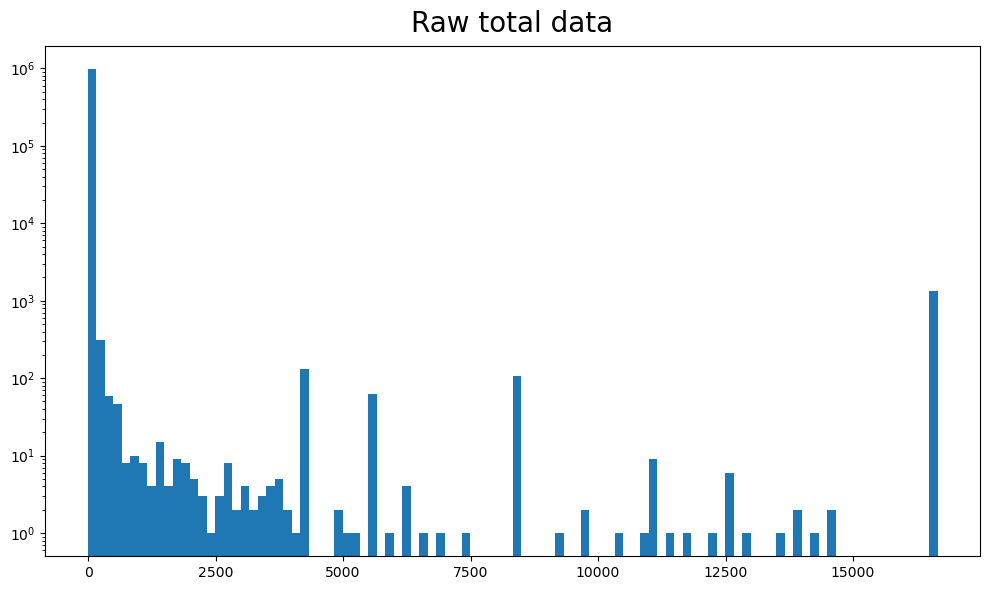

In [12]:
# 1. 초기 전체 데이터 그래프 시각화

fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi=100)

values = df_test[target_col_name]
ax.hist(values, bins=100, log=True)  # y축 크기가 너무 커서 로그를 넣었습니다.

ax.set_title('Raw total data', fontsize=20, pad=10)
# ax.set_ylim(0,1000)

plt.tight_layout()
plt.savefig('./test_outputs/test_images/test_img1_raw_total_hist.png')  # 이미지 저장

plt.show()



## 정상 데이터 처리
1. 정상 데이터만 필터링
2. IQR 기준으로 outlier 제거
    - 제거한 outlier는 abnormal로 할당
3. 수정된 정상 데이터의 통계치(mean, SD, min, max)로 정상 데이터 색상 코드 부여

In [13]:
df_normal = df_test[df_test['is_norm']==True]   # df_normal: 정상값들만 있는 데이터프레임
df_abnorm = df_test[df_test['is_norm']==False]   # df_abnorm: 비정상값들만 있는 데이터프레임


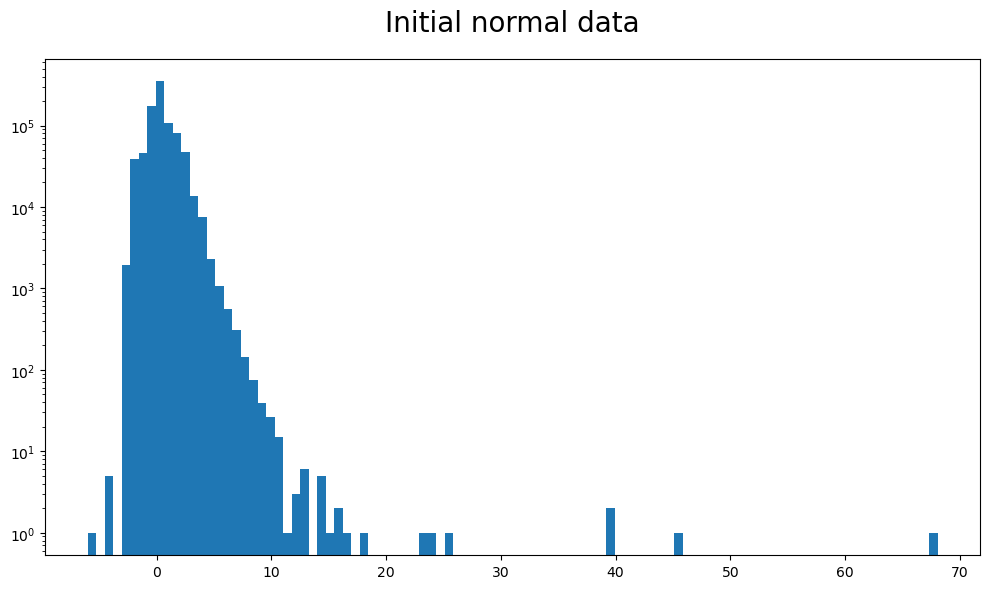

In [14]:
# 2. 초기 정상 그래프 시각화

fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi=100)

values = df_normal[target_col_name]
ax.hist(values, bins=100, log=True)  # y축 크기가 너무 커서 로그를 넣었습니다.
# ax.hist(values, bins=100)  
ax.set_title('Initial normal data', fontsize=20, pad=20)


plt.tight_layout()
plt.savefig('./test_outputs/test_images/test_img2_initial_normal_hist.png') # 이미지 저장

plt.show()



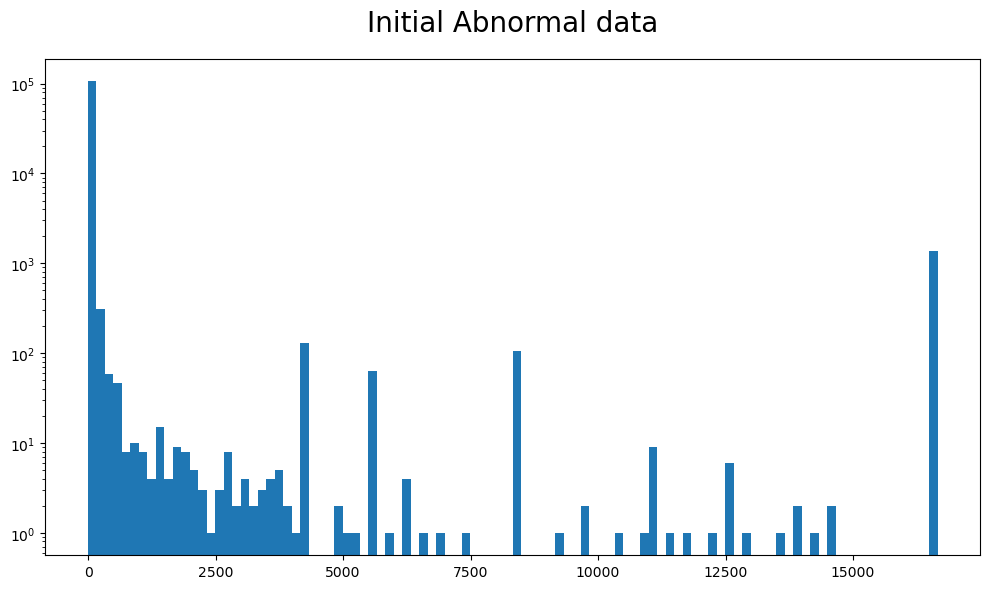

In [15]:
# 3. 초기 비정상 그래프 시각화

fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi=100)

values = df_abnorm[target_col_name]
ax.hist(values, bins=100, log=True)  # y축 크기가 너무 커서 로그를 넣었습니다.
# ax.hist(values, bins=100) 
ax.set_title('Initial Abnormal data', fontsize=20, pad=20)


plt.tight_layout()
plt.savefig('./test_outputs/test_images/test_img3_initial_Abnormal_hist.png') # 이미지 저장

plt.show()



In [16]:
df_normal[target_col_name].describe()   # 정상 데이터들의 통계치 확인

count    873635.000000
mean          0.354841
std           1.173136
min          -6.015311
25%          -0.277697
50%           0.119220
75%           0.928671
max          68.043839
Name: C1, dtype: float64

In [17]:
norm_stats = df_normal[target_col_name].describe()  # 정상 데이터의 통계치

norm_std = norm_stats['std']  # 정상 표준편차
norm_IQR = norm_stats['75%'] - norm_stats['25%']  # 정상 IQR
norm_min = norm_stats['25%'] - norm_IQR  # 정상값 min 기준
norm_max = norm_stats['75%'] + norm_IQR  # 정상값 max 기준

print(f'norm_IQR:  {norm_IQR}')
print(f'norm_min: {norm_min}')
print(f'norm_max:  {norm_max}')

norm_IQR:  1.206367939710617
norm_min: -1.4840648174285889
norm_max:  2.1350390017032623


In [18]:
# 테스트 데이터프레임의 is_norm 컬럼을 업데이트

df_test['is_norm'] = df_test.apply(lambda x: False # 아래 기준을 충족하면 False(비정상)으로 입력
                                     if x['Fake_1CHAR_MAP'] != 54   # 초기 기준: Fake_1CHAR_MAP값이 54가 아닌 값들 (=비정상)
                                       or x[target_col_name] < norm_min   # C1 컬럼의 값이 최소 기준값보다 작거나(= min side outlier)
                                       or x[target_col_name] > norm_max   # C1 컬럼의 값이 최대 기준값보다 크거나(= max side outlier)
                                       
                                   else True, axis=1)  # 위 조건에 해당하지 않는 값들은 모두 정상(True)

In [19]:
df_test['is_norm'].value_counts()  # 위 작업을 시행 후 정상/비정상 비율 

True     757970
False    224030
Name: is_norm, dtype: int64

In [20]:
df_test

,Fake_1CHAR_MAP,C1,is_norm
0,6,0.087086,False
1,14,2.170419,False
2,54,0.087086,True
3,54,0.087086,True
4,54,0.087086,True
...,...,...,...
981995,54,0.099693,True
981996,54,2.183026,False
981997,54,0.099693,True
981998,36,2.183026,False


- 981996 행의 값을 보면, 기준값은 54지만 C1의 값이 norm_max값보다 커서 값이 True->False로 바뀜

In [21]:
df_norm = df_test[df_test['is_norm']==True]  # 새롭게 갱신된 정상 데이터
df_abnorm = df_test[df_test['is_norm']==False]  # 새롭게 갱신된 정상 데이터


## 정상 데이터 구간 색상 코드 부여

In [22]:

norm_stats = df_norm[target_col_name].describe()   # 새로운 정상 데이터의 통계치


norm_mean = norm_stats['mean']  # 평균
norm_std = norm_stats['std']  # 표준편차
norm_80_range = (norm_mean - norm_std, norm_mean + norm_std)  # 색상코드 80이 들어갈 범위: 평균-1SD ~ 평균+1SD

# 위 통계값들 출력
print(f'norm_mean: {norm_mean}')  
print(f'norm_std:  {norm_std}')
print(f'norm_80_range: {norm_80_range}')

norm_mean: 0.24447442591190338
norm_std:  0.7572135925292969
norm_80_range: (-0.5127391666173935, 1.0016880184412003)


In [23]:
norm_min_temp = norm_stats['min']  # 정상치의 최솟값
norm_max_temp = norm_stats['max']  # 정상치의 최댓값

med_to_max_temp = abs(abs(norm_max_temp) - abs(norm_mean))  # 평균~최댓값 거리
med_to_min_temp = abs(abs(norm_min_temp) - abs(norm_mean))  # 평균~최솟값 거리

print(f'med_to_max_temp: {med_to_max_temp}')
print(f'med_to_min_temp: {med_to_min_temp}')

med_to_max_temp: 1.883535847067833
med_to_min_temp: 1.23149012029171


In [24]:
# 실제 사용할 거리는 정상:80 구간(평균+-1표준편차)을 제외하고 min/max까지의 구간 크기를 사용

med_to_max = abs(abs(norm_max) - (abs(norm_mean)+norm_std) )
med_to_min = abs(abs(norm_min) - (abs(norm_mean)+norm_std) )

print(f'med_to_max: {med_to_max}')
print(f'med_to_min: {med_to_min}')

max_side_step = med_to_max / 5
min_side_step = med_to_min / 5

print(f'max_side_step: {max_side_step}')
print(f'min_side_step: {min_side_step}')

med_to_max: 1.133350983262062
med_to_min: 0.4823767989873886
max_side_step: 0.22667019665241242
min_side_step: 0.09647535979747772


- 정상 구간은 min/max 방향을 각각 5분할하여 각각에 코드를 부여

In [25]:
def set_normal_color(value):
    
    if norm_mean-norm_std <= value <= norm_mean+norm_std:
        # 데이터가 정상 범위 구간 내(1표준편차 구간 이내)
        
        set_color = 80

    else:
        
        set_color = -1  # 기본값을 -1로 설정, 아래 조건에 해당되지 않는 값들은 이 값을 반환
        
        out_colors = [97, 114, 131, 148, 165]  # 중앙 구간 외에 부여할 코드
    
        if value > norm_mean:  # 값이 평균보다 큰 경우 -> max side
            
            for k, i in enumerate(range(1,5+1)):
                
                if value <= (norm_mean+norm_std) + max_side_step * i: # max side의 step을 사용
                    set_color = out_colors[k] # 각 step 별 코드 부여
                    break
            
        else:  # 값이 평균보다 작은 경우 -> min side
            
            for k, i in enumerate(range(1,5+1)):
                
                if value >= (norm_mean-norm_std) - min_side_step * i:  # min side의 step을 사용
                    set_color = out_colors[k]  # 각 step 별 코드 부여
                    break
                    
    
    return set_color
    

In [26]:

    
df_test['new_C'] = df_test[target_col_name].apply(set_normal_color)
df_test



,Fake_1CHAR_MAP,C1,is_norm,new_C
0,6,0.087086,False,80
1,14,2.170419,False,-1
2,54,0.087086,True,80
3,54,0.087086,True,80
4,54,0.087086,True,80
...,...,...,...,...
981995,54,0.099693,True,80
981996,54,2.183026,False,-1
981997,54,0.099693,True,80
981998,36,2.183026,False,-1


In [27]:
df_test['new_C'].value_counts().sort_index()

-1      178946
 80     593833
 97      31682
 114     51922
 131     56444
 148     37596
 165     31577
Name: new_C, dtype: int64

- `-1`은 정상 구간 내에서 정상 값으로 처리되지 않은 값들
- 즉, 정상 구간 내에 포함되어있는 비정상값들

In [28]:
df_abnorm = df_test[df_test['new_C']==-1]
df_abnorm

,Fake_1CHAR_MAP,C1,is_norm,new_C
1,14,2.170419,False,-1
10,8,2.170419,False,-1
16,54,2.170419,False,-1
17,9,2.170419,False,-1
20,54,-1.996247,False,-1
...,...,...,...,...
981987,54,2.183026,False,-1
981988,54,2.183026,False,-1
981990,54,2.183026,False,-1
981996,54,2.183026,False,-1


### 비정상 구간 데이터들의 통계치 확인

In [29]:
df_abnorm[target_col_name].describe()

count    178946.000000
mean        141.232376
std        1475.099243
min         -10.868288
25%          -1.622828
50%           2.170419
75%           2.635439
max       16654.949219
Name: C1, dtype: float64

In [30]:
from scipy.stats import mode

mode(df_abnorm[target_col_name])  # mode, 최빈값 확인

ModeResult(mode=array([-1.9604744], dtype=float32), count=array([4788]))

In [31]:
abnorm_max = df_abnorm[target_col_name].max()
abnorm_min = df_abnorm[target_col_name].min()

print(f'abnorm_max: {abnorm_max}')
print(f'abnorm_min: {abnorm_min}')

abnorm_max: 16654.94921875
abnorm_min: -10.868288040161133


In [32]:
norm_mean

0.24447442591190338

- 비정상 구간에서는 **데이터가 많은 쪽**을 택해서 해당 구간을 11분할하여 색상 코드 부여
    - 구간 초과값 = 255

In [33]:
# 데이터가 많은 쪽(min/max) 확인

abnorm_max_side_count = sum(df_abnorm[target_col_name] > norm_mean)
abnorm_min_side_count = sum(df_abnorm[target_col_name] < norm_mean)

print(f'abnorm_max_side_count: {abnorm_max_side_count}')
print(f'abnorm_min_side_count: {abnorm_min_side_count}')

abnorm_max_side_count: 96285
abnorm_min_side_count: 82661


In [34]:
if abnorm_max_side_count > abnorm_min_side_count:
    abnorm_side = 'max'
else:
    abnorm_side = 'min'
    
abnorm_side

'max'

In [35]:
# 구간을 나눌 step 계산
# - 정상 구간을 제외하고 데이터의 끝까지
# - 정상 최댓값 ~ 데이터 최댓값
# - 정상 최솟값 ~ 데이터 최솟값

df_norm_values = df_test[df_test['new_C']!=-1][target_col_name]  # 정상 영역의 데이터

norm_max = df_norm_values.max()  # 정상 구간의 최댓값
norm_min = df_norm_values.min()  # 정상 구간의 최댓값

if abnorm_side == 'max':    
    abnorm_step = (abnorm_max - norm_max) /11  # (정상 구간 ~ 비정상 구간) / 11
elif abnorm_side == 'min':  
    abnorm_step = (abnorm_min - norm_min) /11  # (정상 구간 ~ 비정상 구간) / 11
    
    
abnorm_step

1513.8928371342745

In [36]:
def set_abnormal_color(value):
    
    if norm_mean-norm_std <= value <= norm_mean+norm_std:
        # 데이터가 정상 범위 구간 내
        # 비정상 데이터 중 정상 범위 내에 속하는 데이터가 있으면, 이를 업데이트해서 정상 구간으로 표시
        
        set_color = set_normal_color(value)
        if set_color == -1:  # 만일 정상 구간이라 확인되어 정상 구간으로 색상을 할당하려 했으나,
            print('-1 again')  # 또다시 비정상구간(-1)로 확인되면 에러 메시지 출력

    else:
        
        set_color = -1  # 색상 코드가 할당되지 않았을 때의 초기값
        
        out_colors = [173, 181, 190, 198, 206, 214, 222, 230, 239, 247, 255]  # 11분할 색상 코드
    
        if value > norm_mean:  # 값이 평균보다 큰 경우 -> max side
            
            for k, i in enumerate(range(1,11+1)):
                
                if norm_max < value < norm_max + abnorm_step * i:  # 11개의 구간 중 일치하는 구간이 나온 경우
                    set_color = out_colors[k]  # 색상 코드 할당 후 종료
                    break
                else:
                    set_color = 255  # 모든 구간보다 현재 값이 더 큰 경우 -> 255로 설정
            
        else:  # 값이 평균보다 작은 경우 -> min side
            
            for k, i in enumerate(range(1,11+1)):
                
                if norm_min <=value < norm_min - abnorm_step * i:  # 11개의 구간 중 일치하는 구간이 나온 경우
                    set_color = out_colors[k]  # 색상 코드 할당 후 종료
                    break
                else:
                    set_color = 255 # 모든 구간보다 현재 값이 더 작은 경우 -> 255로 설정
                    
    
    return set_color
    
    

In [37]:

df_test['new_C2'] = df_test.apply(lambda x: set_abnormal_color(x[target_col_name]) if x['new_C']==-1 
                                             else x['new_C'], axis=1)
df_test

,Fake_1CHAR_MAP,C1,is_norm,new_C,new_C2
0,6,0.087086,False,80,80
1,14,2.170419,False,-1,173
2,54,0.087086,True,80,80
3,54,0.087086,True,80,80
4,54,0.087086,True,80,80
...,...,...,...,...,...
981995,54,0.099693,True,80,80
981996,54,2.183026,False,-1,173
981997,54,0.099693,True,80,80
981998,36,2.183026,False,-1,173


In [38]:
df_test['new_C'].value_counts().sort_index()

-1      178946
 80     593833
 97      31682
 114     51922
 131     56444
 148     37596
 165     31577
Name: new_C, dtype: int64

In [39]:
df_test['new_C2'].value_counts().sort_index()

80     593833
97      31682
114     51922
131     56444
148     37596
165     31577
173     94526
181        45
190       149
198        68
206         7
214       106
222         4
230        12
239         9
247         5
255     84015
Name: new_C2, dtype: int64

In [40]:
# 165를 초과하는 비정상치들
df_test['new_C2'][df_test['new_C2'] > 165].value_counts()

173    94526
255    84015
190      149
214      106
198       68
181       45
230       12
239        9
206        7
247        5
222        4
Name: new_C2, dtype: int64

In [41]:
# 위 new_C에서 -1로 할당된 값들과 개수가 같음
df_test['new_C2'][df_test['new_C2'] > 165].value_counts().sum()

178946

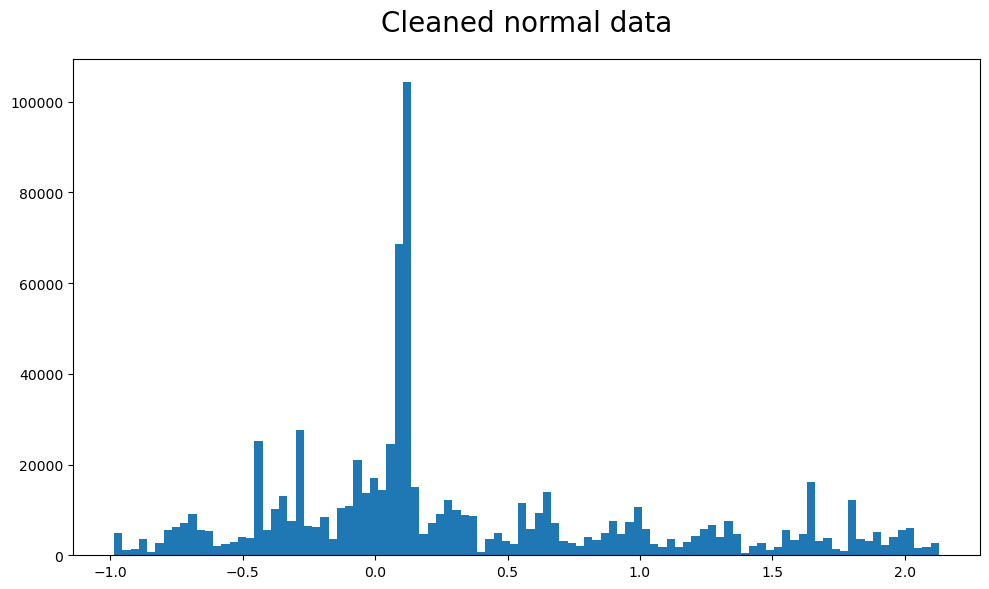

In [42]:
# 4. 전처리 후 정상 그래프 시각화

fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi=100)

values = df_test[(80<=df_test['new_C2'])&(df_test['new_C2']<=165)][target_col_name]  # 컬러 코드가 80~165 (정상치)
# ax.hist(values, bins=100, log=True)  # y축 크기가 너무 커서 로그를 넣었습니다.
ax.hist(values, bins=100)  # 전처리 후 정상 데이터는 log를 빼도 그래프가 괜찮습니다
ax.set_title('Cleaned normal data', fontsize=20, pad=20)


plt.tight_layout()
plt.savefig('./test_outputs/test_images/test_img4_Cleaned_normal_hist.png') # 이미지 저장

plt.show()



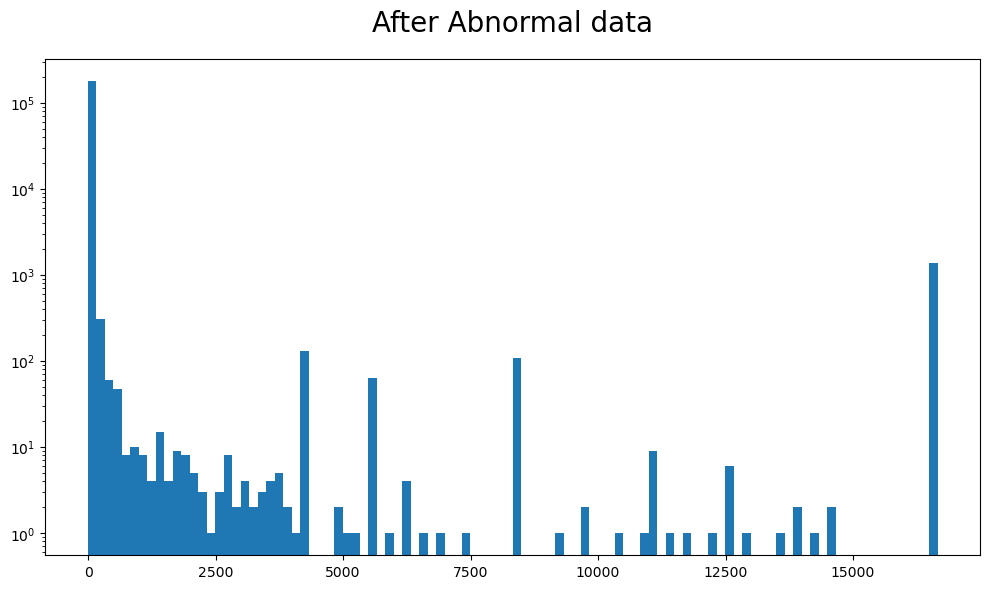

In [43]:
# 5. 전처리 후 남은 비정상 그래프 시각화

fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white', dpi=100)

values = df_test[df_test['new_C2'] > 165][target_col_name]  # 컬러 코드가 165 초과 (비정상치)
ax.hist(values, bins=100, log=True)  # y축 크기가 너무 커서 로그를 넣었습니다.
# ax.hist(values, bins=100) 
ax.set_title('After Abnormal data', fontsize=20, pad=20)


plt.tight_layout()
plt.savefig('./test_outputs/test_images/test_img5_after_Abnormal_hist.png') # 이미지 저장

plt.show()



## 최종 데이터 엑셀로 저장
- 불필요시 주석처리

In [44]:
df_test = df_test.drop(['is_norm', 'new_C'], axis=1)
df_test.to_excel('./test_outputs/test_output.xlsx', index=False, encoding='cp949')